In [1]:
from FyeldGenerator import generate_field
import matplotlib.pyplot as plt
import numpy as np

(246, 249)


c:\users\thackray\.conda\envs\moseq-detectron\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.


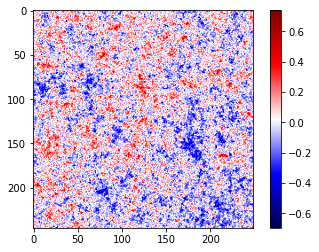

In [70]:
# Helper that generates power-law power spectrum
def Pkgen(n):
    def Pk(k):
        return np.power(k, -n)

    return Pk

# Draw samples from a normal distribution
def distrib(shape):
    a = np.random.normal(loc=0, scale=10, size=shape)
    b = np.random.normal(loc=0, scale=10, size=shape)
    #a = np.random.poisson(lam=0.0005, size=shape)
    #b = np.random.poisson(lam=0.0005, size=shape)
    return a + 1j * b


shape = (246,249)

field = generate_field(distrib, Pkgen(1.5), shape)

if field.shape != shape:
    f2 = np.zeros(shape)
    f2[0:field.shape[0], 0:field.shape[1]] = field
    field = f2
print(field.shape)

plt.imshow(field, cmap='seismic')
plt.colorbar()

In [71]:
from moseq2_detectron_extract.model.augmentations import RandomFieldNoiseAugmentation

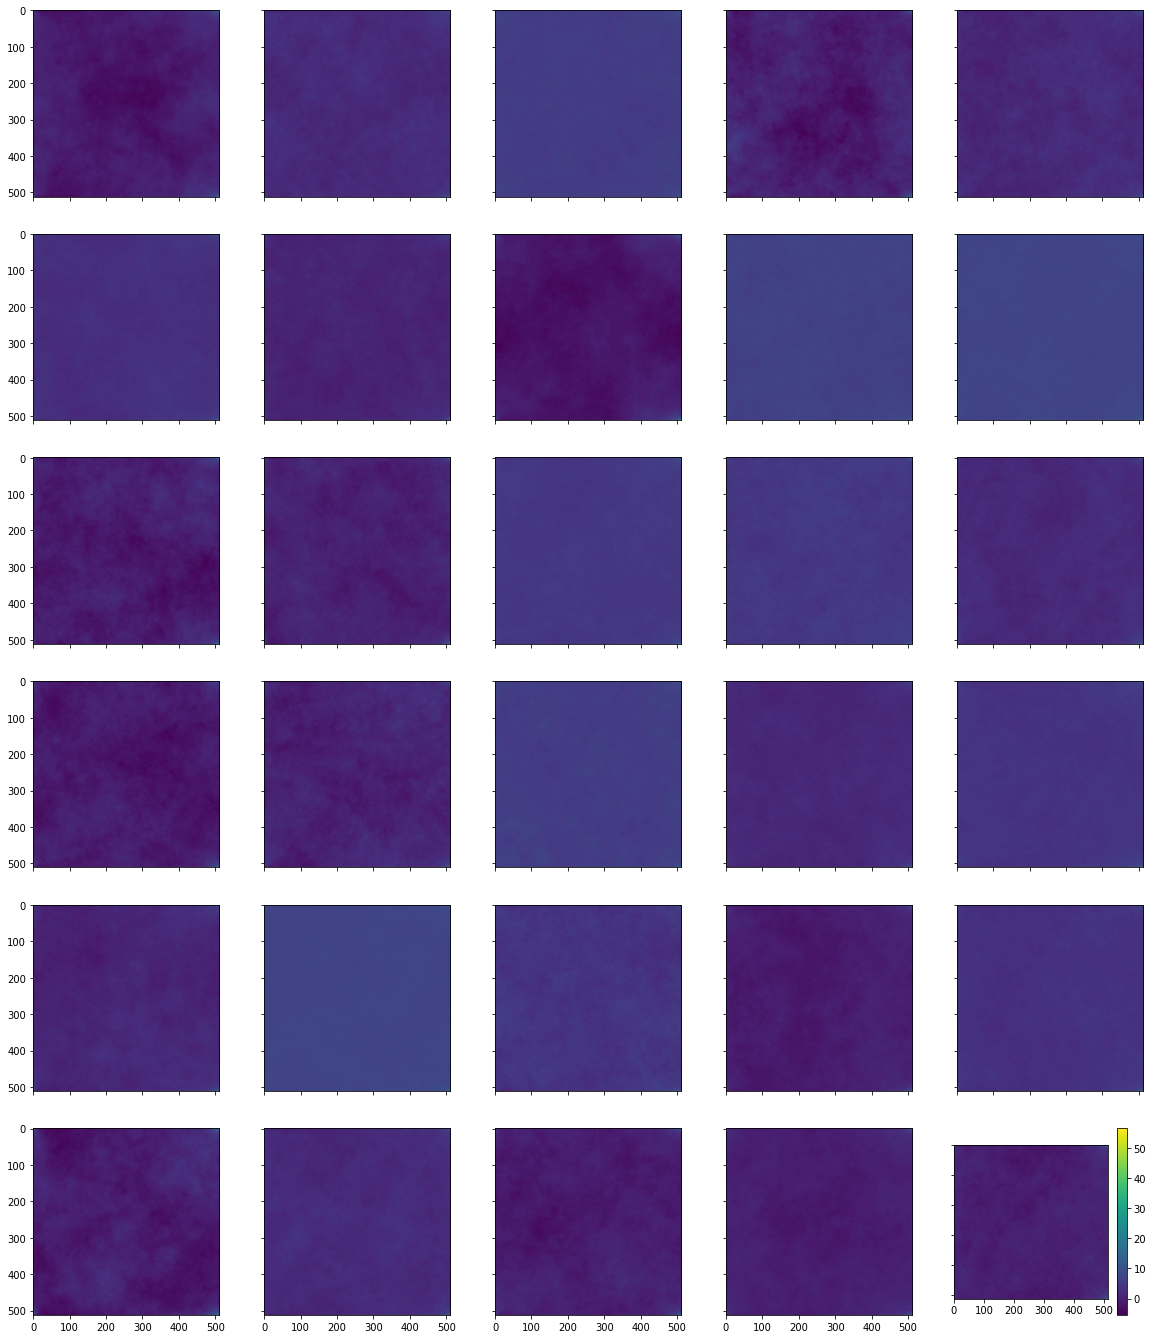

In [83]:
gen = RandomFieldNoiseAugmentation(mu=10, std_limit=(10.0, 20.0), power=(2.0, 3.0), always_apply=True)

nrows = 5
ncols = 6

vmin=None
vmax=None

fig, axs = plt.subplots(ncols, nrows, figsize=(20, 24), sharex=True, sharey=True)

for r in range(nrows):
    for c in range(ncols):
        im = axs[c,r].imshow(gen.get_field((512, 512)), vmin=vmin, vmax=vmax)
plt.colorbar(im)